In [214]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - Intercement data

In [216]:
xls = pd.ExcelFile(
    "../../../../data/raw/HubIC/EMBRAPII hUbiC IACC Template-2.xlsx", engine="openpyxl"
)

<IPython.core.display.Javascript object>

In [217]:
xls.sheet_names

['CPV', 'CPIII 40', 'CPII F32']

<IPython.core.display.Javascript object>

# Cimento CPV

In [218]:
df = pd.read_excel(xls, "CPV", header=[0, 1, 2])

<IPython.core.display.Javascript object>

In [219]:
df.shape

(193, 49)

<IPython.core.display.Javascript object>

## Extração dados de cimento

In [298]:
df_filer = df["Materiais cimentícios suplementares"]["Fíler calcário"].copy()
df_filer.columns = df_filer.columns.map(lambda x: "Filer_" + x)

df_composicao = df["Cimento"]["Composição"].copy()
df_quimica = df["Cimento"]["Análise química"].copy()

df_fisico_1 = df["Característias físicas do cimento"].copy()
df_fisico_1.columns = df_fisico_1.columns.droplevel(-2)


df_pega = df["Propriedades do cimento"]["Tempo de pega"]
df_pega = df_pega.rename({"Inicio": "Inicio de Pega", "Fim": "Fim de Pega"}, axis=1)
df_resistencia = df["Propriedades do cimento"]["Resistência à compressão"]

df_resistencia = df_resistencia.rename(
    {"1 d": "RC1", "3 d": "RC3", "7 d": "RC7"}, axis=1
)

df_cimento = pd.concat(
    [df_filer, df_composicao, df_quimica, df_fisico_1, df_pega, df_resistencia], axis=1
)

df_cimento = df_cimento.iloc[3:].reset_index(drop=True)

df_cimento = df_cimento.astype(float)

<IPython.core.display.Javascript object>

## Extração dados de Moagem

In [349]:
df = pd.read_excel(xls, "CPV", header=[0, 1, 2])
# df_moagem = df_moagem.drop(df_moagem.columns[0], axis=1)
df_moagem = df["Moagem"].copy()
df_moagem.columns = df_moagem.columns.droplevel(-1)
df_moagem = df_moagem.iloc[3:].reset_index(drop=True)
df_moagem[
    ["Temperatura do moinho", "Temperatura do cimento na saída do moinho"]
] = df_moagem[
    ["Temperatura do moinho", "Temperatura do cimento na saída do moinho"]
].astype(
    float
)

<IPython.core.display.Javascript object>

## Extração dados de Clinker

In [350]:
df_clinker = df["Clínquer"]["Análise química"]
df_clinker = df_clinker.iloc[3:].reset_index(drop=True)
df_clinker = df_clinker.astype(float)

<IPython.core.display.Javascript object>

# EDA Dados Cimento

In [351]:
df_cimento.head()

,Filer_CaO,Filer_K2O,Filer_MgO,Filer_Na2O,Filer_SiO2,Filer_Al2O3,Filer_Fe2O3,Filer_Perda ao fogo,Filer_Produção tph,Clínquer,...,Resíduo insolúvel,Blaine,#200,#400,Massa específica,Inicio de Pega,Fim de Pega,RC1,RC3,RC7
0,37.400002,0.71,6.18,0.08,9.20,3.15,1.28,38.799999,65.0,90.5,...,0.56,4540.0,0.5,6.30,3.1,130.0,190.0,26.1,33.799999,42.599998
1,46.169998,0.40,3.65,0.06,3.66,1.41,0.53,41.540001,67.0,90.5,...,0.60,4290.0,0.3,6.60,3.1,115.0,175.0,26.1,33.799999,42.599998
2,46.169998,0.40,3.65,0.06,3.66,1.41,0.53,41.540001,70.0,90.5,...,0.60,4180.0,0.4,7.50,3.1,140.0,200.0,26.1,33.799999,42.599998
3,43.150002,0.53,4.61,0.06,5.66,1.96,0.62,41.540001,73.0,90.5,...,0.60,4180.0,0.4,7.50,3.1,140.0,200.0,26.1,33.799999,42.599998
4,39.610001,0.61,6.86,0.06,6.07,2.26,0.90,42.060001,65.0,90.5,...,0.51,4440.0,0.4,5.75,3.1,160.0,220.0,26.1,33.799999,42.599998


<IPython.core.display.Javascript object>

In [352]:
df_cimento.tail()

,Filer_CaO,Filer_K2O,Filer_MgO,Filer_Na2O,Filer_SiO2,Filer_Al2O3,Filer_Fe2O3,Filer_Perda ao fogo,Filer_Produção tph,Clínquer,...,Resíduo insolúvel,Blaine,#200,#400,Massa específica,Inicio de Pega,Fim de Pega,RC1,RC3,RC7
185,42.639999,0.42,4.53,0.04,5.64,1.75,0.82,40.049999,46.0,90.5,...,0.33,4380.0,0.5,6.1,3.10,125.0,185.0,29.200001,36.200001,40.700001
186,42.639999,0.42,4.53,0.04,5.64,1.75,0.82,40.049999,45.5,90.5,...,0.33,4380.0,0.5,6.1,3.10,125.0,185.0,29.200001,36.200001,40.700001
187,42.639999,0.42,4.53,0.04,5.64,1.75,0.82,40.049999,45.5,90.5,...,0.33,4670.0,0.4,5.4,3.10,125.0,185.0,29.200001,36.200001,40.700001
188,36.360001,0.66,4.98,0.05,10.31,3.32,2.15,35.290001,49.0,90.5,...,0.51,4260.0,0.4,5.0,3.11,130.0,250.0,27.500000,34.299999,38.400002
189,40.580002,0.51,3.08,0.05,8.46,2.93,1.97,36.529999,55.0,90.5,...,0.45,4220.0,0.4,6.0,3.11,125.0,185.0,29.799999,35.500000,39.299999


<IPython.core.display.Javascript object>

In [353]:
df_cimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Filer_CaO            190 non-null    float64
 1   Filer_K2O            190 non-null    float64
 2   Filer_MgO            190 non-null    float64
 3   Filer_Na2O           190 non-null    float64
 4   Filer_SiO2           190 non-null    float64
 5   Filer_Al2O3          190 non-null    float64
 6   Filer_Fe2O3          190 non-null    float64
 7   Filer_Perda ao fogo  190 non-null    float64
 8   Filer_Produção tph   190 non-null    float64
 9   Clínquer             190 non-null    float64
 10  Fíler calcário       190 non-null    float64
 11  Sulfato de cálcio    190 non-null    float64
 12  CaO                  190 non-null    float64
 13  MgO                  190 non-null    float64
 14  Na2O                 190 non-null    float64
 15  Al2O3                190 non-null    flo

<IPython.core.display.Javascript object>

In [354]:
df_cimento.describe().T

,count,mean,std,min,25%,50%,75%,max
Filer_CaO,190.0,39.296790,4.483890,28.740000,36.252501,39.240002,42.457500,50.250000
Filer_K2O,190.0,0.616316,0.190941,0.170000,0.480000,0.620000,0.730000,1.120000
Filer_MgO,190.0,5.305579,1.836876,1.620000,3.830000,5.225000,6.700000,9.630000
Filer_Na2O,190.0,0.076158,0.017043,0.040000,0.070000,0.080000,0.087500,0.140000
Filer_SiO2,190.0,8.739842,3.486713,1.930000,5.950000,8.250000,11.125000,18.379999
Filer_Al2O3,190.0,3.002947,1.081057,0.820000,2.147500,2.925000,3.805000,6.580000
Filer_Fe2O3,190.0,1.398526,0.688905,0.260000,0.890000,1.320000,1.672500,3.910000
Filer_Perda ao fogo,190.0,38.379211,3.873515,22.969999,37.320000,38.789999,40.680000,68.190002
Filer_Produção tph,190.0,67.663158,6.379507,43.500000,67.000000,70.000000,71.000000,77.000000
Clínquer,190.0,90.500000,0.000000,90.500000,90.500000,90.500000,90.500000,90.500000


<IPython.core.display.Javascript object>

In [355]:
df_cimento.describe().T.style.background_gradient(cmap="Blues", axis=1)

,count,mean,std,min,25%,50%,75%,max
Filer_CaO,190.000000,39.296790,4.483890,28.740000,36.252501,39.240002,42.457500,50.250000
Filer_K2O,190.000000,0.616316,0.190941,0.170000,0.480000,0.620000,0.730000,1.120000
Filer_MgO,190.000000,5.305579,1.836876,1.620000,3.830000,5.225000,6.700000,9.630000
Filer_Na2O,190.000000,0.076158,0.017043,0.040000,0.070000,0.080000,0.087500,0.140000
Filer_SiO2,190.000000,8.739842,3.486713,1.930000,5.950000,8.250000,11.125000,18.379999
Filer_Al2O3,190.000000,3.002947,1.081057,0.820000,2.147500,2.925000,3.805000,6.580000
Filer_Fe2O3,190.000000,1.398526,0.688905,0.260000,0.890000,1.320000,1.672500,3.910000
Filer_Perda ao fogo,190.000000,38.379211,3.873515,22.969999,37.320000,38.789999,40.680000,68.190002
Filer_Produção tph,190.000000,67.663158,6.379507,43.500000,67.000000,70.000000,71.000000,77.000000
Clínquer,190.000000,90.500000,0.000000,90.500000,90.500000,90.500000,90.500000,90.500000


<IPython.core.display.Javascript object>

In [356]:
df_cimento.describe().style.background_gradient(cmap="Blues")

,Filer_CaO,Filer_K2O,Filer_MgO,Filer_Na2O,Filer_SiO2,Filer_Al2O3,Filer_Fe2O3,Filer_Perda ao fogo,Filer_Produção tph,Clínquer,Fíler calcário,Sulfato de cálcio,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,Fe2O3,Perda ao fogo,Resíduo insolúvel,Blaine,#200,#400,Massa específica,Inicio de Pega,Fim de Pega,RC1,RC3,RC7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,39.296790,0.616316,5.305579,0.076158,8.739842,3.002947,1.398526,38.379211,67.663158,90.500000,4.000000,5.500000,60.435611,4.185869,0.110883,4.753594,17.843437,3.193111,0.762864,3.170227,3.543352,0.575421,4306.078947,0.516737,5.901798,3.112842,132.763158,192.868421,27.436842,35.073684,39.799474
std,4.483890,0.190941,1.836876,0.017043,3.486713,1.081057,0.688905,3.873515,6.379507,0.000000,0.000000,0.000000,0.581169,0.532021,0.014898,0.177592,0.357248,0.310377,0.075076,0.096443,0.555962,0.240596,179.918791,0.130590,0.703172,0.021240,13.786801,14.144326,2.304840,1.545515,1.704476
min,28.740000,0.170000,1.620000,0.040000,1.930000,0.820000,0.260000,22.969999,43.500000,90.500000,4.000000,5.500000,58.599998,2.680000,0.080000,4.240000,17.000000,2.490000,0.480000,3.000000,2.233333,0.140000,3800.000000,0.200000,4.600000,3.080000,100.000000,160.000000,17.500000,30.600000,35.700001
25%,36.252501,0.480000,3.830000,0.070000,5.950000,2.147500,0.890000,37.320000,67.000000,90.500000,4.000000,5.500000,60.097500,3.840833,0.100000,4.660000,17.602500,3.022500,0.714375,3.100000,3.258500,0.400000,4182.000000,0.400000,5.400000,3.100000,125.000000,185.000000,26.100000,33.900002,38.525000
50%,39.240002,0.620000,5.225000,0.080000,8.250000,2.925000,1.320000,38.789999,70.000000,90.500000,4.000000,5.500000,60.465000,4.310000,0.110000,4.745000,17.855000,3.112500,0.770000,3.165000,3.513000,0.520000,4310.000000,0.500000,5.800000,3.110000,130.000000,190.000000,27.600000,35.099998,39.950001
75%,42.457500,0.730000,6.700000,0.087500,11.125000,3.805000,1.672500,40.680000,71.000000,90.500000,4.000000,5.500000,60.847499,4.550000,0.120000,4.823750,18.080000,3.207500,0.810000,3.229167,3.834000,0.680000,4440.000000,0.600000,6.300000,3.130000,140.000000,200.000000,29.100000,36.275000,40.875001
max,50.250000,1.120000,9.630000,0.140000,18.379999,6.580000,3.910000,68.190002,77.000000,90.500000,4.000000,5.500000,62.313332,5.650000,0.145000,5.650000,18.990000,4.070000,0.930000,3.920000,5.753333,1.440000,4930.000000,1.100000,7.900000,3.160000,165.000000,250.000000,32.500000,39.900002,45.200001


<IPython.core.display.Javascript object>

In [357]:
df_cimento.shape

(190, 31)

<IPython.core.display.Javascript object>

# EDA Dados Clinker

In [358]:
df_clinker.head()

,CaO,K2O,MgO,Na2O,SiO2,Al2O3,Fe2O3,SO3,Perda ao fogo,Resíduo insolúvel
0,63.029999,0.70,4.62,0.13,18.860001,5.04,3.20,1.98,1.16,0.21
1,63.000000,0.73,4.38,0.13,19.059999,5.09,3.22,1.95,0.00,0.21
2,63.000000,0.73,4.38,0.13,19.059999,5.09,3.22,1.95,0.00,0.21
3,63.189999,0.75,4.53,0.13,19.240000,4.87,3.23,1.84,0.00,0.21
4,63.040001,0.74,4.49,0.13,19.090000,4.84,3.22,1.83,0.01,0.21


<IPython.core.display.Javascript object>

In [359]:
df_clinker.tail()

,CaO,K2O,MgO,Na2O,SiO2,Al2O3,Fe2O3,SO3,Perda ao fogo,Resíduo insolúvel
185,61.299999,0.83,4.61,0.09,18.639999,4.87,3.24,1.71,0.45,0.17
186,61.299999,0.83,4.61,0.09,18.639999,4.87,3.24,1.71,0.45,0.17
187,61.299999,0.83,4.61,0.09,18.639999,4.87,3.24,1.71,0.45,0.17
188,61.840000,0.72,4.84,0.08,19.200001,4.87,3.27,1.71,2.16,0.17
189,61.610001,0.74,4.64,0.08,19.280001,4.86,3.17,1.61,2.18,0.17


<IPython.core.display.Javascript object>

In [360]:
df_clinker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                190 non-null    float64
 1   K2O                190 non-null    float64
 2   MgO                190 non-null    float64
 3   Na2O               190 non-null    float64
 4   SiO2               190 non-null    float64
 5   Al2O3              190 non-null    float64
 6   Fe2O3              190 non-null    float64
 7   SO3                190 non-null    float64
 8   Perda ao fogo      190 non-null    float64
 9   Resíduo insolúvel  190 non-null    float64
dtypes: float64(10)
memory usage: 15.0 KB


<IPython.core.display.Javascript object>

In [361]:
df_clinker.describe().T

,count,mean,std,min,25%,50%,75%,max
CaO,190.0,62.813368,0.729558,60.450001,62.307501,62.860001,63.2700,64.730003
K2O,190.0,0.825526,0.088099,0.410000,0.770000,0.830000,0.8900,1.050000
MgO,190.0,4.308105,0.601458,2.680000,3.932500,4.475000,4.7025,5.320000
Na2O,190.0,0.134789,0.019564,0.080000,0.130000,0.140000,0.1500,0.170000
SiO2,190.0,19.326158,0.529124,17.770000,18.959999,19.320000,19.6800,20.980000
Al2O3,190.0,4.875368,0.103539,4.490000,4.810000,4.870000,4.9300,5.180000
Fe2O3,190.0,3.219368,0.136435,2.920000,3.142500,3.210000,3.2800,4.410000
SO3,190.0,1.767000,0.182895,1.360000,1.660000,1.750000,1.8700,2.640000
Perda ao fogo,190.0,0.598895,0.502705,0.000000,0.230000,0.515000,0.8100,2.730000
Resíduo insolúvel,190.0,0.196316,0.224801,0.050000,0.100000,0.180000,0.2100,2.160000


<IPython.core.display.Javascript object>

In [362]:
df_clinker.describe().T.style.background_gradient(cmap="Blues", axis=1)

,count,mean,std,min,25%,50%,75%,max
CaO,190.000000,62.813368,0.729558,60.450001,62.307501,62.860001,63.270000,64.730003
K2O,190.000000,0.825526,0.088099,0.410000,0.770000,0.830000,0.890000,1.050000
MgO,190.000000,4.308105,0.601458,2.680000,3.932500,4.475000,4.702500,5.320000
Na2O,190.000000,0.134789,0.019564,0.080000,0.130000,0.140000,0.150000,0.170000
SiO2,190.000000,19.326158,0.529124,17.770000,18.959999,19.320000,19.680000,20.980000
Al2O3,190.000000,4.875368,0.103539,4.490000,4.810000,4.870000,4.930000,5.180000
Fe2O3,190.000000,3.219368,0.136435,2.920000,3.142500,3.210000,3.280000,4.410000
SO3,190.000000,1.767000,0.182895,1.360000,1.660000,1.750000,1.870000,2.640000
Perda ao fogo,190.000000,0.598895,0.502705,0.000000,0.230000,0.515000,0.810000,2.730000
Resíduo insolúvel,190.000000,0.196316,0.224801,0.050000,0.100000,0.180000,0.210000,2.160000


<IPython.core.display.Javascript object>

In [330]:
df_clinker.describe().style.background_gradient(cmap="Blues")

,CaO,K2O,MgO,Na2O,SiO2,Al2O3,Fe2O3,SO3,Perda ao fogo,Resíduo insolúvel
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
unique,104.000000,35.000000,92.000000,9.000000,95.000000,41.000000,42.000000,57.000000,80.000000,16.000000
top,62.860001,0.830000,5.060000,0.140000,19.719999,4.920000,3.250000,1.740000,0.000000,0.180000
freq,6.000000,18.000000,5.000000,62.000000,7.000000,17.000000,12.000000,8.000000,12.000000,44.000000


<IPython.core.display.Javascript object>

In [363]:
df_clinker.shape

(190, 10)

<IPython.core.display.Javascript object>

# EDA Dados Moagem

In [364]:
df_moagem.head()

,Tipo de aditivo,Tipo do moinho,Tempo de moagem,Temperatura do moinho,Temperatura do cimento na saída do moinho,Obs.,Obs.
0,NaN,None,2022-05-04 00:00:00,870.000000,88.300003,Ligado,CPV-ARIRS
1,NaN,None,2022-05-05 12:00:00,128.727371,93.180191,Ligado,CPV-ARIRS
2,NaN,None,2022-05-06 00:00:00,119.786835,85.877136,Ligado,CPV-ARIRS
3,NaN,None,2022-05-06 12:00:00,118.660591,85.364433,Ligado,CPV-ARIRS
4,NaN,None,2022-05-08 00:00:00,153.484146,100.130753,Ligado,CPV-ARIRS


<IPython.core.display.Javascript object>

In [365]:
df_moagem.tail()

,Tipo de aditivo,Tipo do moinho,Tempo de moagem,Temperatura do moinho,Temperatura do cimento na saída do moinho,Obs.,Obs.
185,NaN,None,2023-03-19 00:00:00,105.815002,91.190018,Ligado,CPV-ARIRS
186,NaN,None,2023-03-19 12:00:00,107.476921,91.000000,Ligado,CPV-ARIRS
187,NaN,NaN,2023-03-20 00:00:00,112.150841,92.220016,Ligado,CPV-ARIRS
188,NaN,NaN,2023-03-23 12:00:00,126.704544,97.447456,Ligado,CPV-ARIRS
189,NaN,NaN,2023-03-25 00:00:00,125.349655,96.806107,Ligado,CPV-ARIRS


<IPython.core.display.Javascript object>

In [366]:
df_moagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tipo de aditivo                            0 non-null      object 
 1   Tipo do moinho                             0 non-null      object 
 2   Tempo de moagem                            190 non-null    object 
 3   Temperatura do moinho                      190 non-null    float64
 4   Temperatura do cimento na saída do moinho  190 non-null    float64
 5   Obs.                                       190 non-null    object 
 6   Obs.                                       190 non-null    object 
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


<IPython.core.display.Javascript object>

In [367]:
df_moagem.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperatura do moinho,190.0,116.293726,56.211189,80.214676,105.778032,111.449562,119.715714,870.000000
Temperatura do cimento na saída do moinho,190.0,87.806095,9.488770,66.471573,80.438293,90.833611,95.366922,104.414978


<IPython.core.display.Javascript object>

In [370]:
df_moagem.describe(exclude="number").T

,count,unique,top,freq
Tipo de aditivo,0,0,NaN,NaN
Tipo do moinho,0,0,NaN,NaN
Tempo de moagem,190,190,2022-10-21 00:00:00,1
Obs.,190,2,Ligado,189
Obs.,190,1,CPV-ARIRS,190


<IPython.core.display.Javascript object>

In [369]:
df_moagem.describe().T.style.background_gradient(cmap="Blues", axis=1)

,count,mean,std,min,25%,50%,75%,max
Temperatura do moinho,190.000000,116.293726,56.211189,80.214676,105.778032,111.449562,119.715714,870.000000
Temperatura do cimento na saída do moinho,190.000000,87.806095,9.488770,66.471573,80.438293,90.833611,95.366922,104.414978


<IPython.core.display.Javascript object>

In [342]:
# df_moagem.describe().style.background_gradient(cmap="Blues")

<IPython.core.display.Javascript object>

In [344]:
df_moagem.shape

(190, 7)

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

<h2>1. Structure Investigation</h2>

In [296]:
df.dtypes.value_counts()

object     48
float64     1
dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sample_id_plant,36993.0,1.119461e+06,35584.083506,1058139.00,1.088615e+06,1120145.00,1150453.000,1181620.00
cao,36530.0,6.211462e+01,0.846533,0.00,6.184000e+01,62.14,62.440,67.38
sio2,36530.0,1.913358e+01,0.529726,0.00,1.901000e+01,19.22,19.400,21.43
al2o3,36530.0,4.672675e+00,0.180939,0.00,4.560000e+00,4.68,4.800,5.53
fe2o3,36530.0,3.223923e+00,0.233681,0.00,3.160000e+00,3.22,3.280,31.82
mgo,36530.0,3.031658e+00,0.358694,-0.82,2.850000e+00,3.03,3.230,4.72
so3,36530.0,2.996961e+00,0.192194,0.00,2.880000e+00,2.95,3.110,3.92
k2o,36530.0,6.344246e-01,0.053880,0.00,6.000000e-01,0.63,0.670,0.85
na2o,36530.0,7.992417e-02,0.033893,-0.14,5.000000e-02,0.08,0.110,0.24
cl,7.0,1.428571e-03,0.003780,0.00,0.000000e+00,0.00,0.000,0.01


<h3>1.2 Structure of Non-Numeric features</h3>

In [14]:
df.describe(exclude='number').T

,count,unique,top,freq
sample_date,36993,36613,2020-05-11 10:00:00+00:00,3
unified_material_name,36993,3,Type I-II,28444
raw_material_code,36993,2,Finish Mill,35899


In [15]:
df["unified_material_name"].value_counts()

Type I-II    28444
Type III      6093
Type IL       2456
Name: unified_material_name, dtype: int64

In [17]:
dates = df["sample_date"]

In [18]:
print(dates.min())
print(dates.max())

2020-01-01 04:50:00+00:00
2021-12-31 23:50:00+00:00


In [19]:
dates

0        2020-01-01 04:50:00+00:00
1        2020-01-01 05:50:00+00:00
2        2020-01-01 06:50:00+00:00
3        2020-01-01 07:50:00+00:00
4        2020-01-01 08:50:00+00:00
                   ...            
36988    2021-12-31 22:43:00+00:00
36989    2021-12-31 22:50:00+00:00
36990    2021-12-31 23:30:00+00:00
36991    2021-12-31 23:43:00+00:00
36992    2021-12-31 23:50:00+00:00
Name: sample_date, Length: 36993, dtype: object

In [20]:
for column in df.dtypes[df.dtypes == object].keys():
    print(column, df[column].unique())


sample_date ['2020-01-01 04:50:00+00:00' '2020-01-01 05:50:00+00:00'
 '2020-01-01 06:50:00+00:00' ... '2021-12-31 23:30:00+00:00'
 '2021-12-31 23:43:00+00:00' '2021-12-31 23:50:00+00:00']
unified_material_name ['Type I-II' 'Type III' 'Type IL']
raw_material_code ['Finish Mill' 'Daily Average Cement']


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

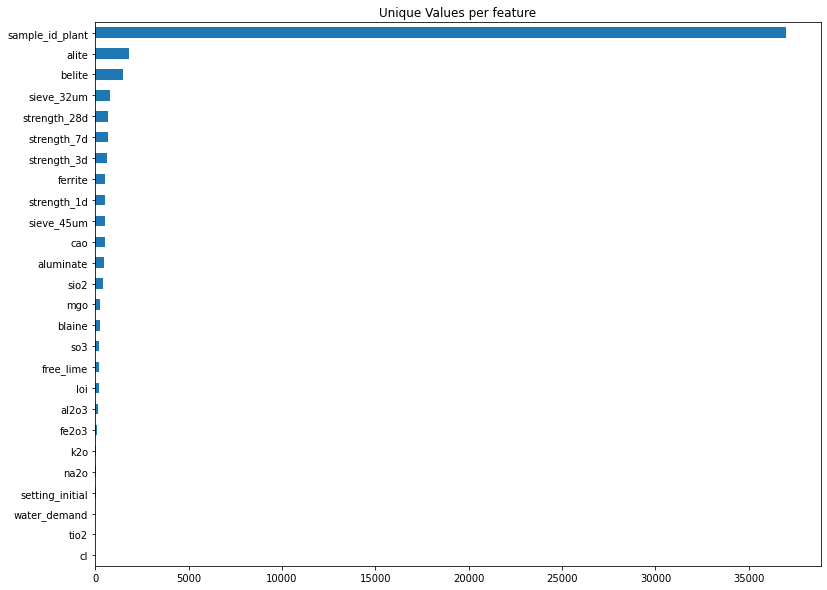

In [21]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0, 1, 2]),
 [Text(0, 0, 'raw_material_code'),
  Text(1, 0, 'unified_material_name'),
  Text(2, 0, 'sample_date')])

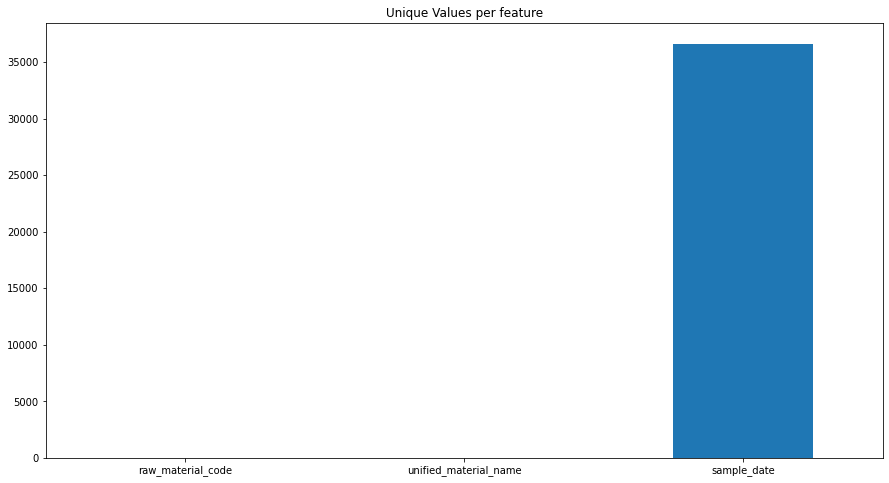

In [22]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [23]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 25 variables with missing values from a total of 29


In [24]:
df.isna().any().sort_values()

sample_date              False
sample_id_plant          False
unified_material_name    False
raw_material_code        False
blaine                    True
strength_28d              True
strength_7d               True
strength_3d               True
strength_1d               True
setting_initial           True
water_demand              True
loi                       True
free_lime                 True
ferrite                   True
aluminate                 True
alite                     True
sieve_32um                True
tio2                      True
cl                        True
na2o                      True
k2o                       True
so3                       True
mgo                       True
fe2o3                     True
al2o3                     True
sio2                      True
cao                       True
belite                    True
sieve_45um                True
dtype: bool

In [25]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

,Missing (count)
cl,36986
tio2,36986
strength_28d,35936
strength_7d,35910
strength_1d,35906
strength_3d,35905
setting_initial,35904
water_demand,35904
loi,35896
sieve_45um,34828


In [26]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  437922 missing values.


/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

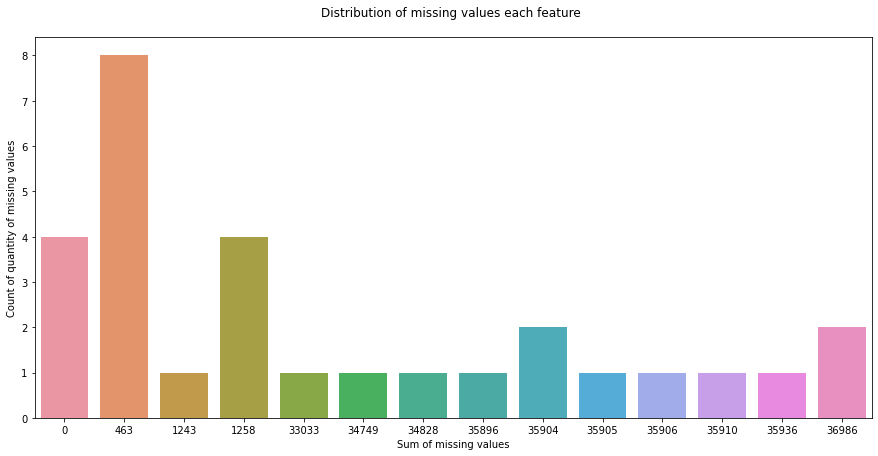

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(df.isna().sum())
plt.title("Distribution of missing values each feature \n")
plt.xlabel("Sum of missing values")
plt.ylabel("Count of quantity of missing values")

<BarContainer object of 29 artists>

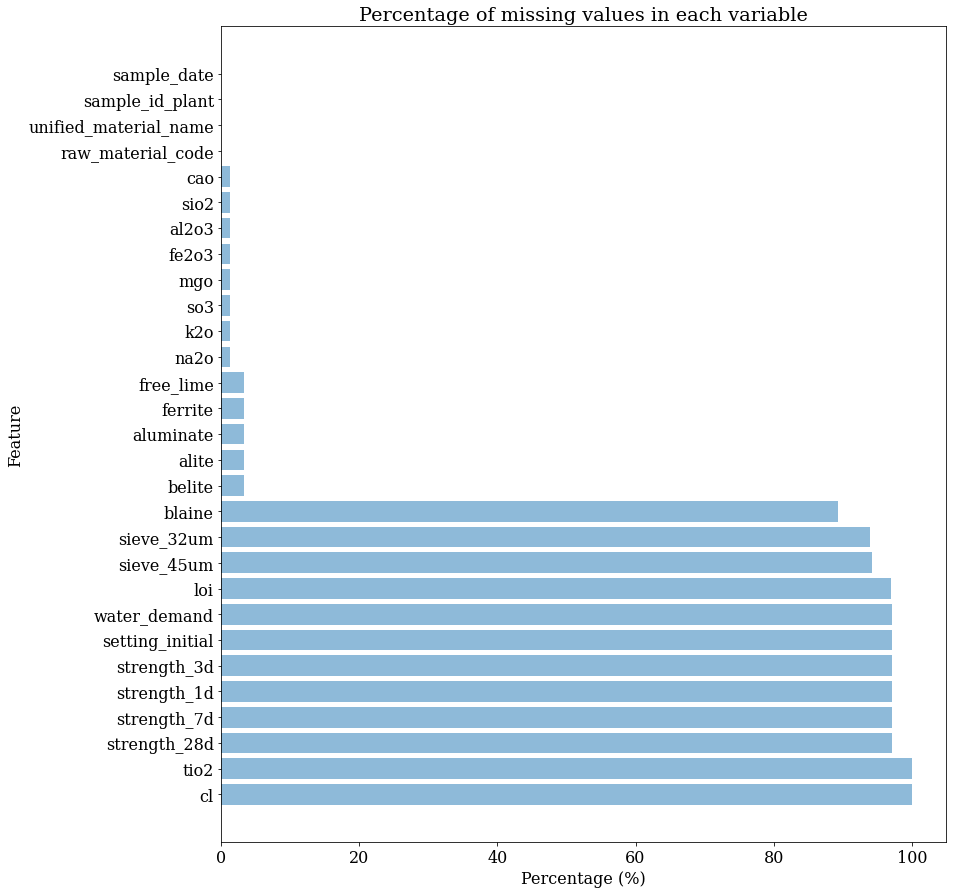

In [28]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [29]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
cl,99.981078
tio2,99.981078
strength_28d,97.142703
strength_7d,97.072419
strength_1d,97.061606
strength_3d,97.058903
setting_initial,97.056200
water_demand,97.056200
loi,97.034574
sieve_45um,94.147541


In [78]:
df["strength_28d"].notna().sum()

1057

<BarContainer object of 29 artists>

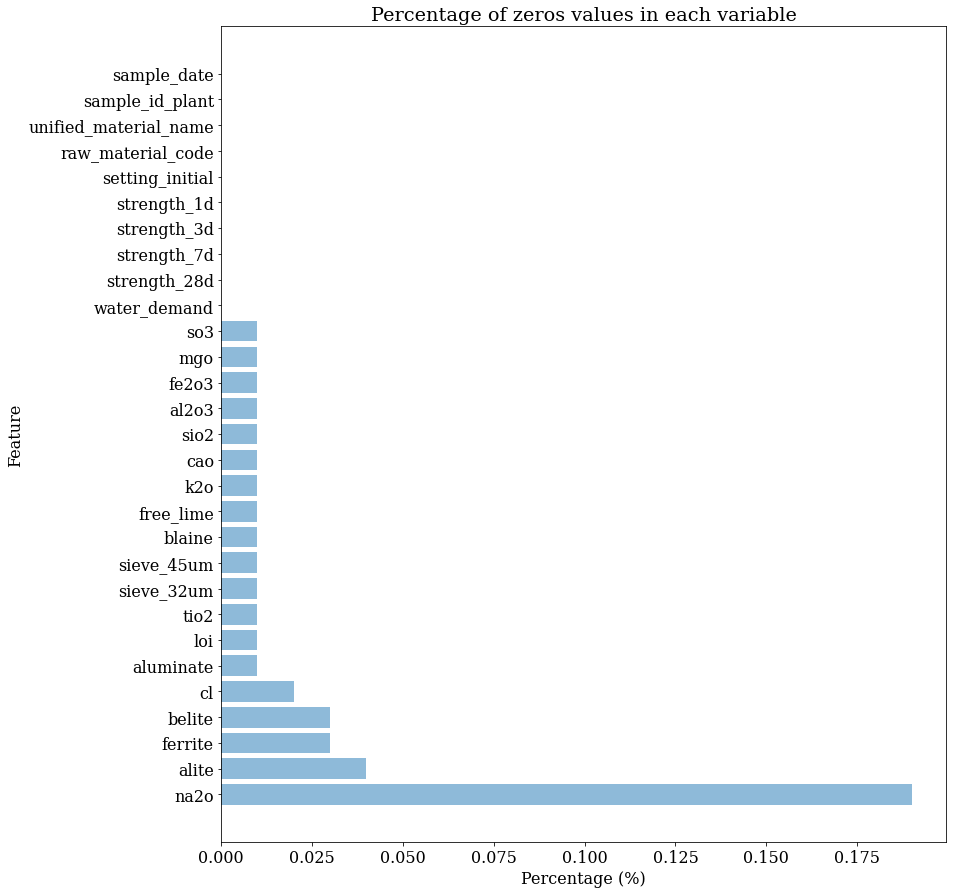

In [30]:
zeros_perc = (df == 0).sum(axis=0) / df.shape[0] * 100
zeros_perc = zeros_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of zeros values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(zeros_perc.index, zeros_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [31]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [33]:
n_duplicates = (
    df.drop(["sample_date"], axis=1)
    .duplicated()
    .sum()
)
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

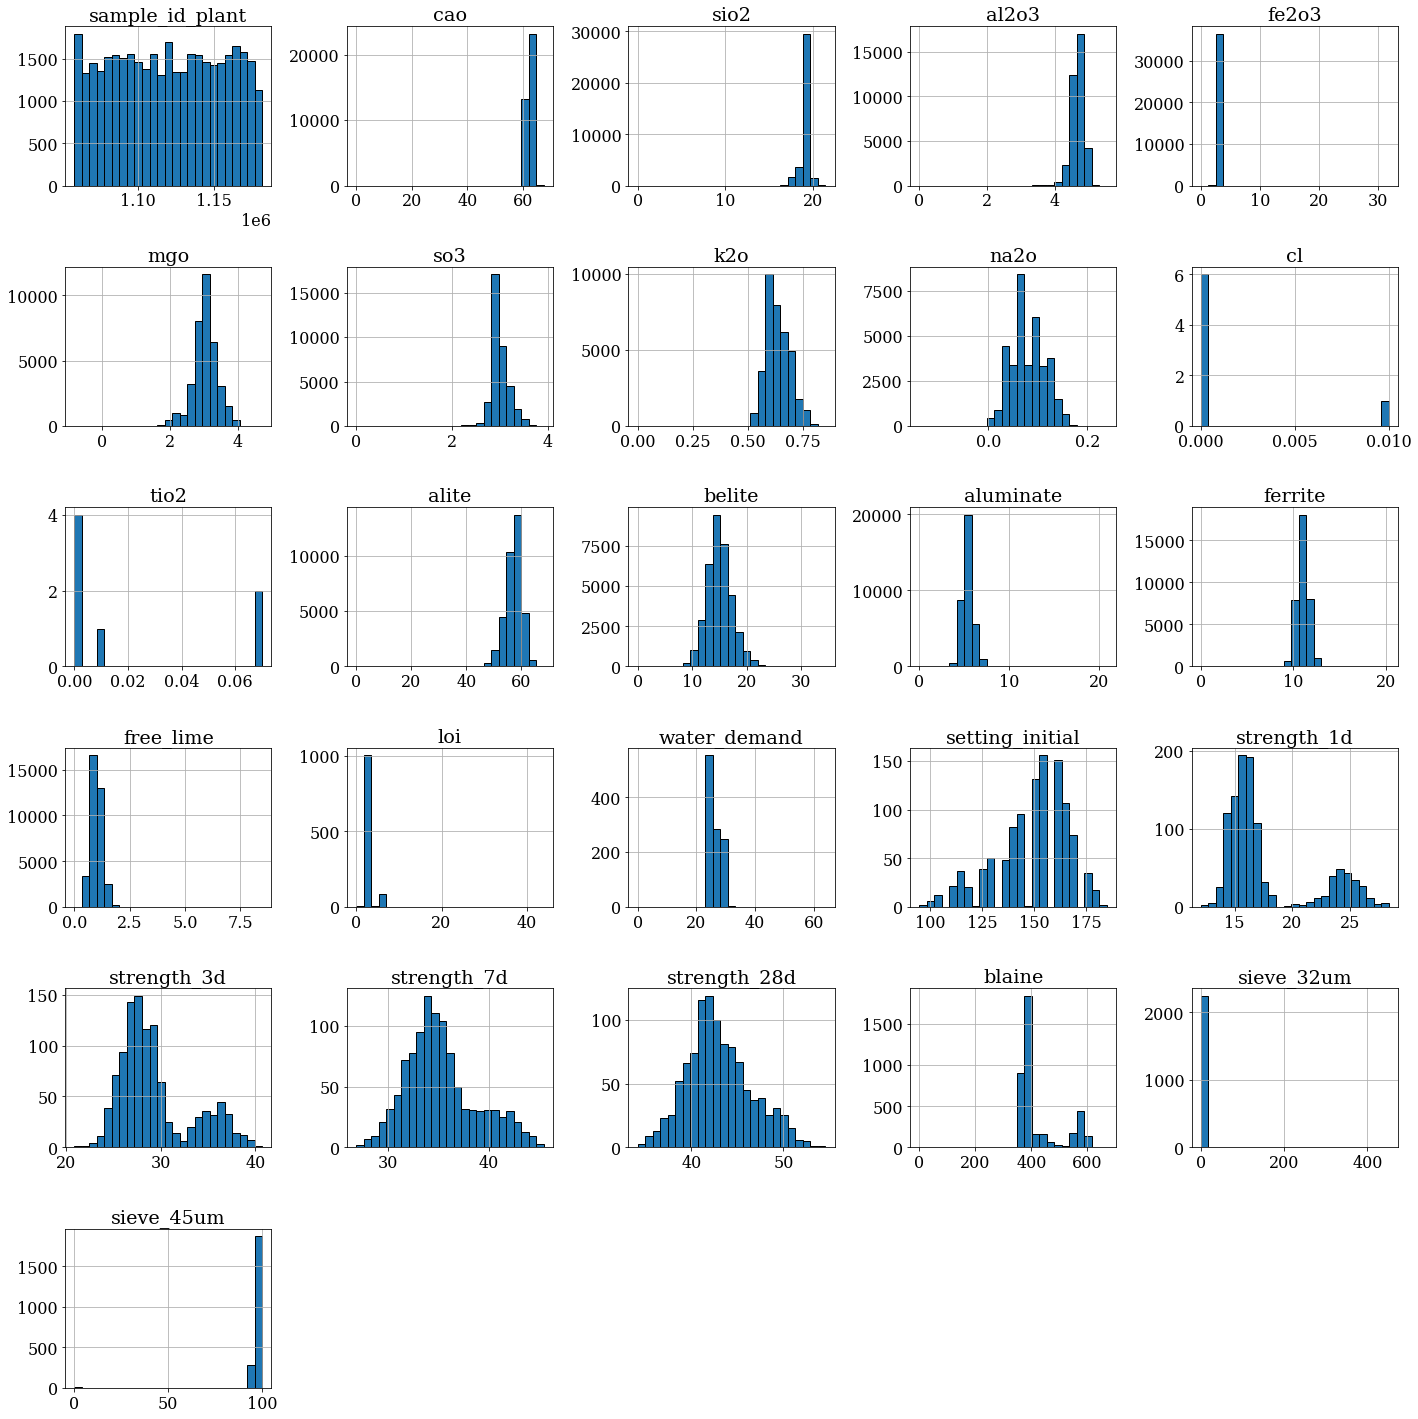

In [34]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

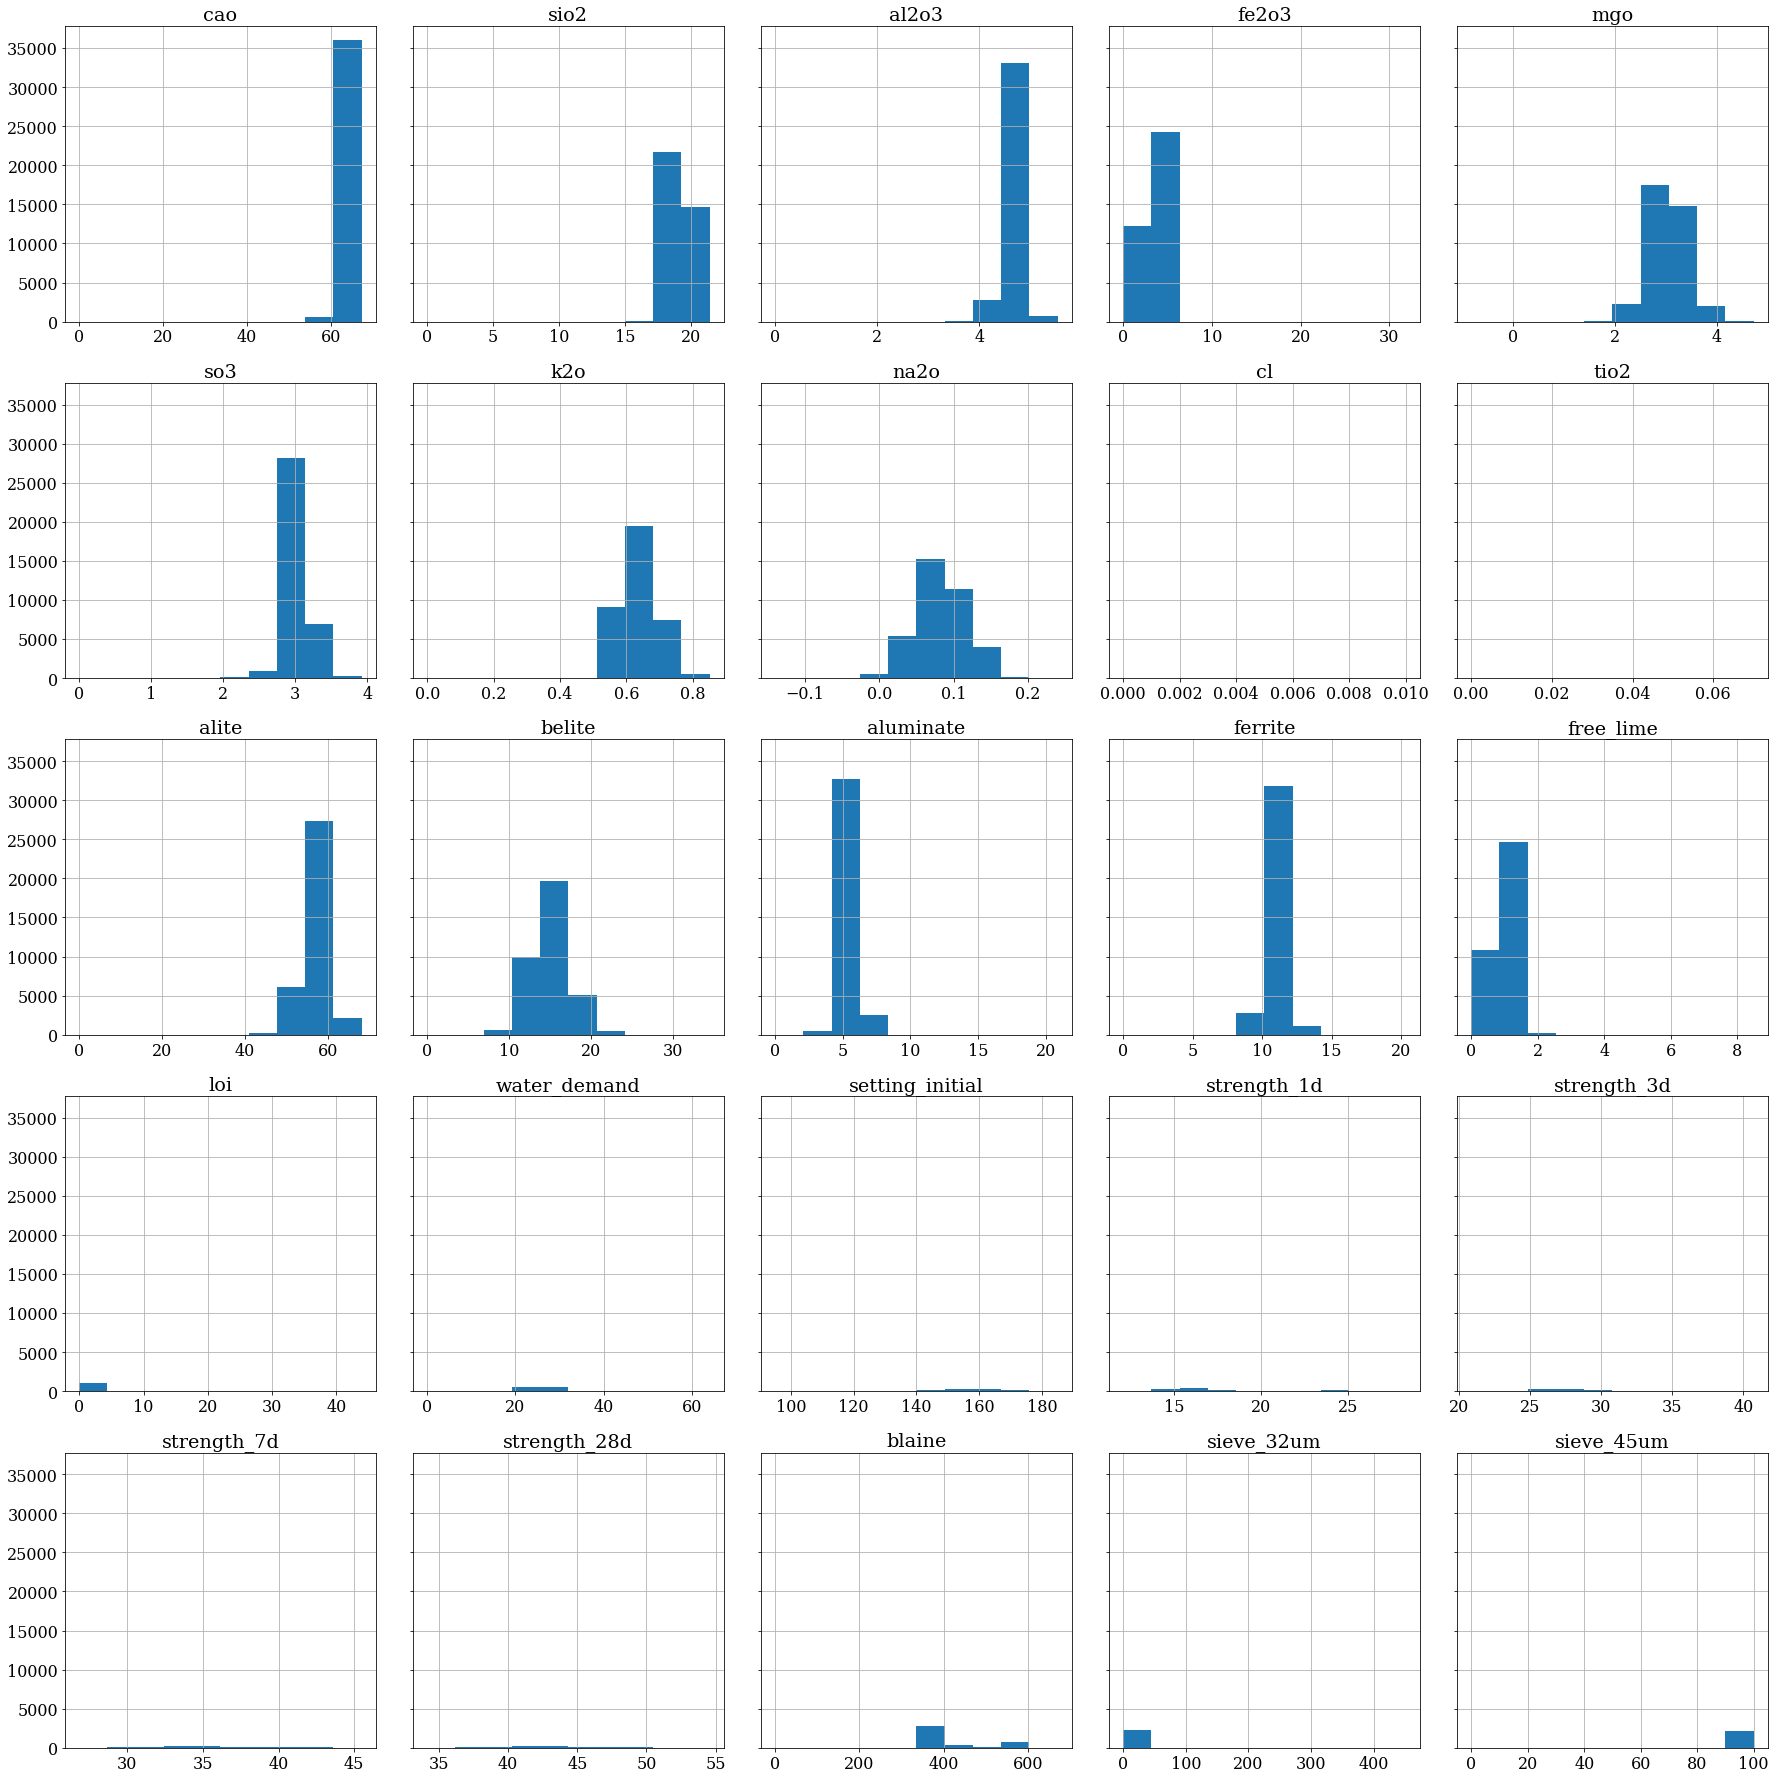

In [35]:
df.select_dtypes(include='float64').hist(figsize=(25, 25), sharey=True);
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

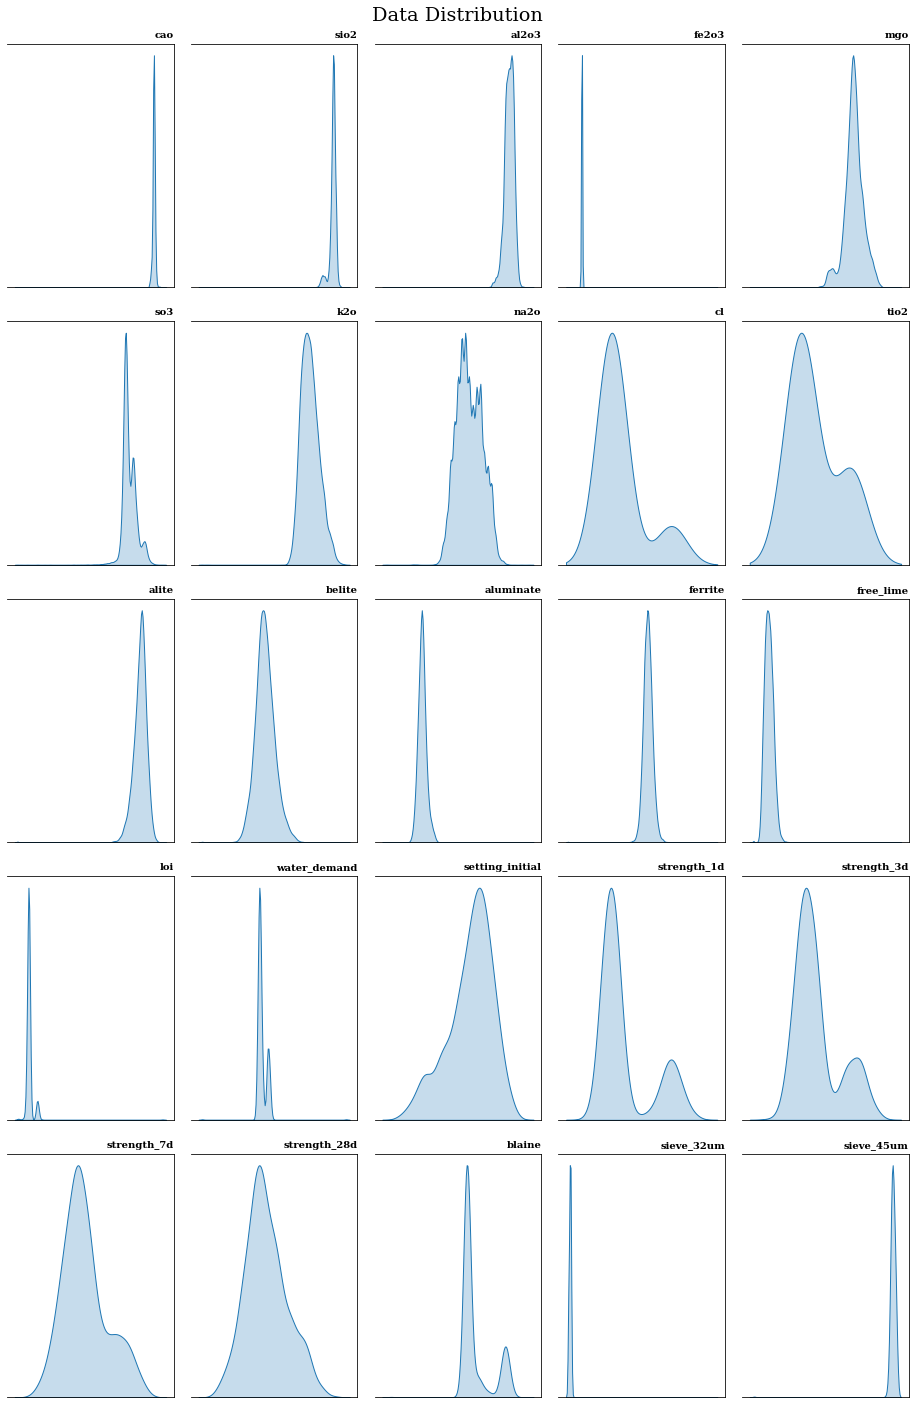

In [36]:
fig, axes = plt.subplots(5, 5, figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

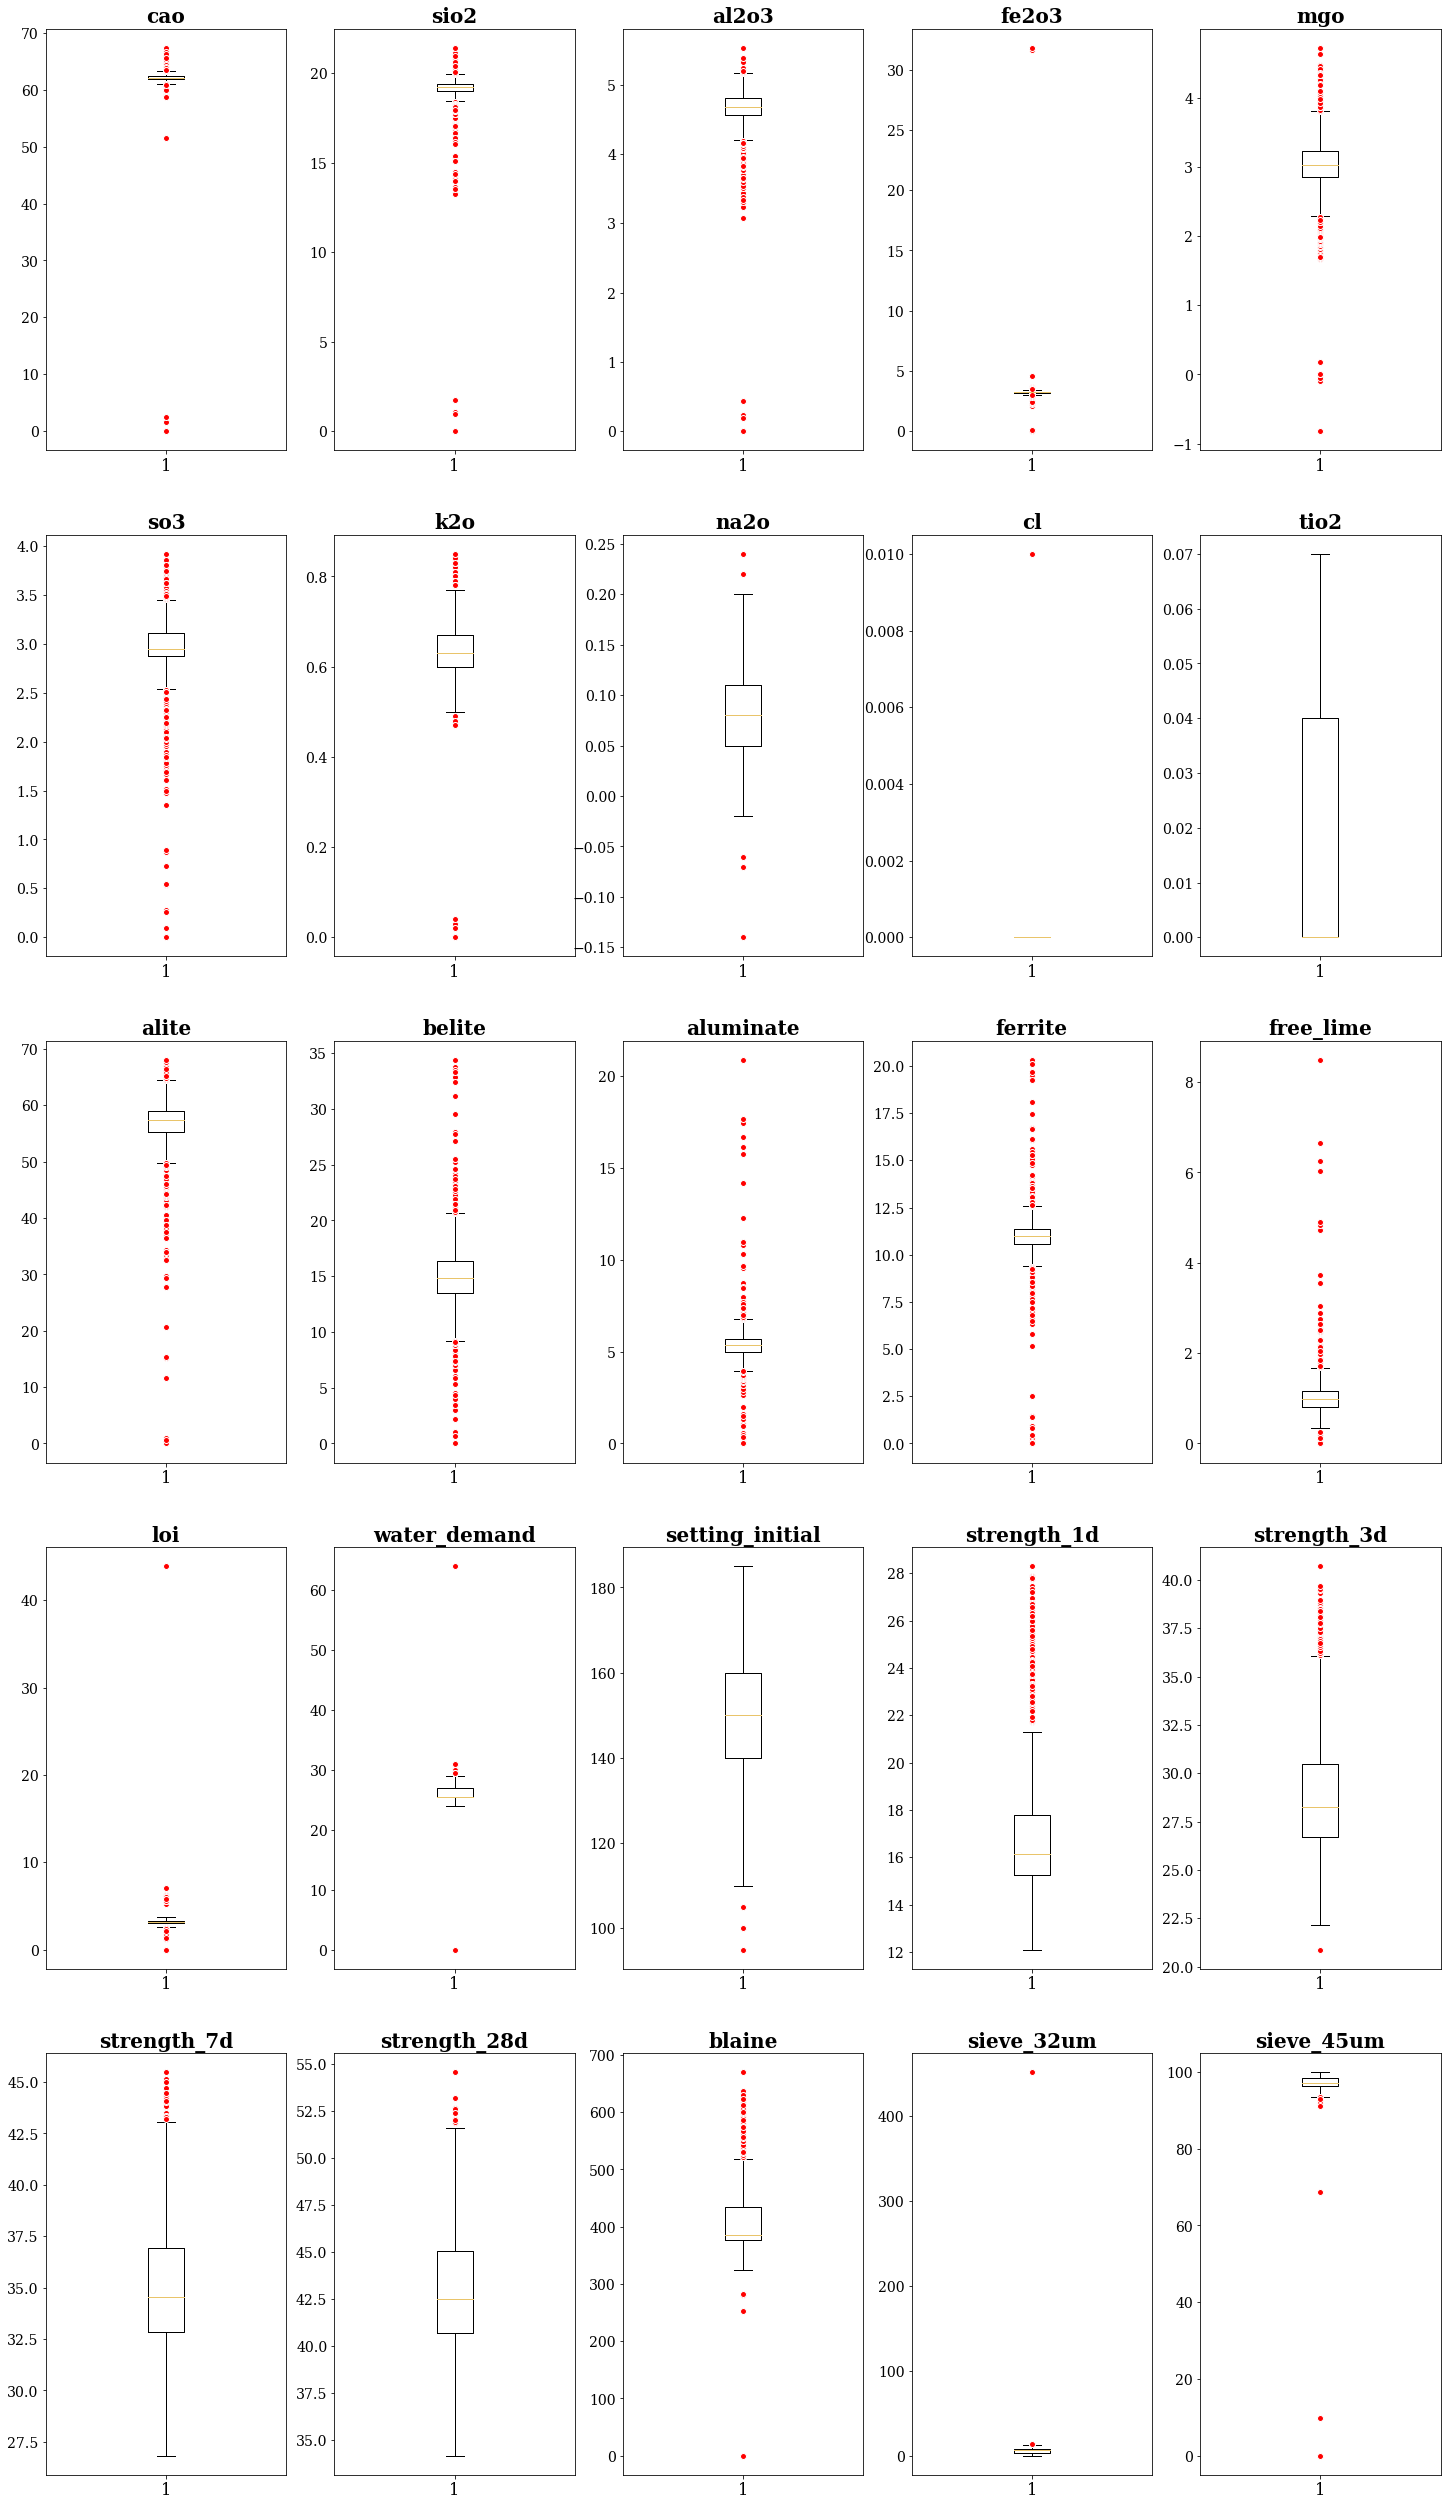

In [37]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(5, 5, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

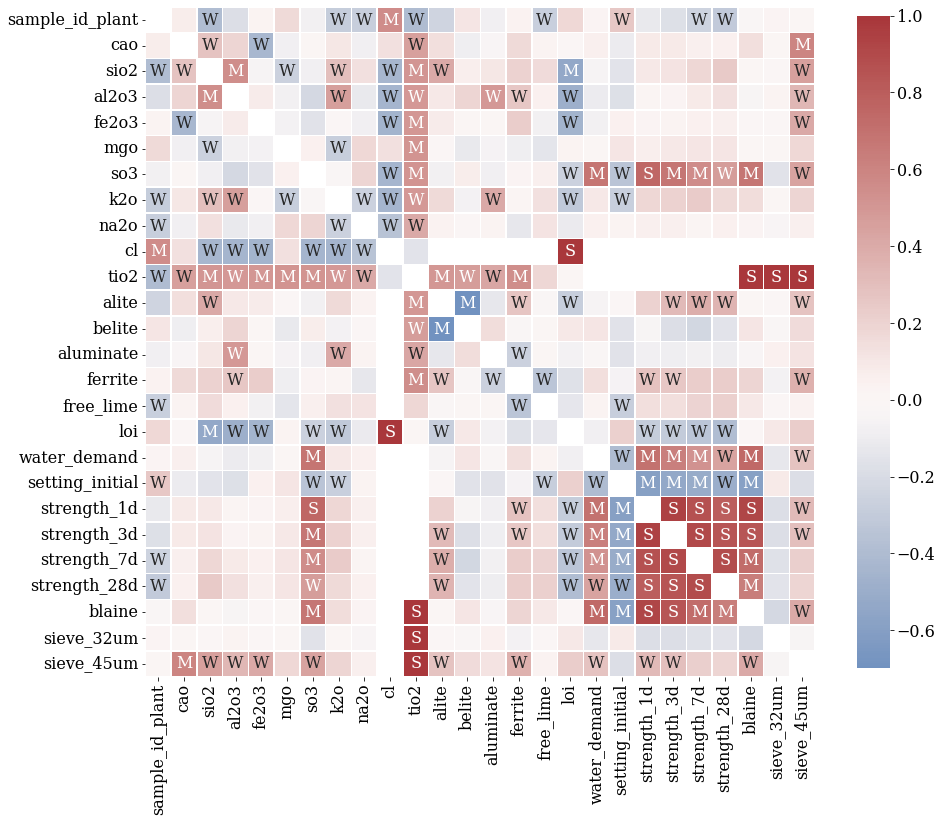

In [38]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) >= 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

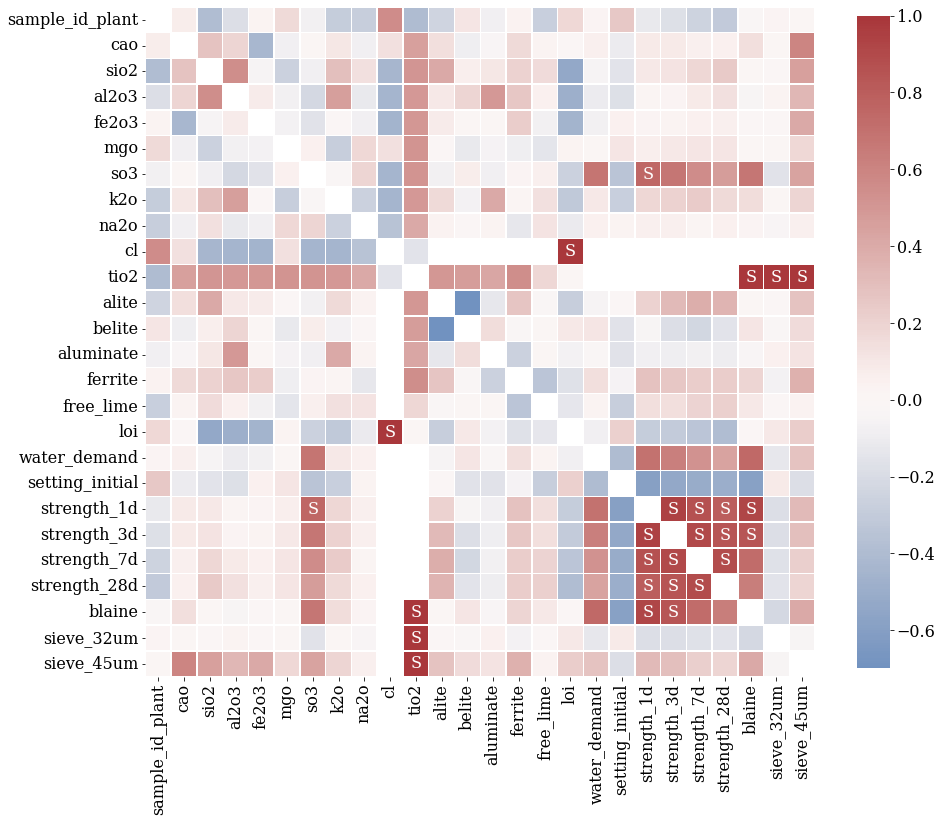

In [39]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) >= 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

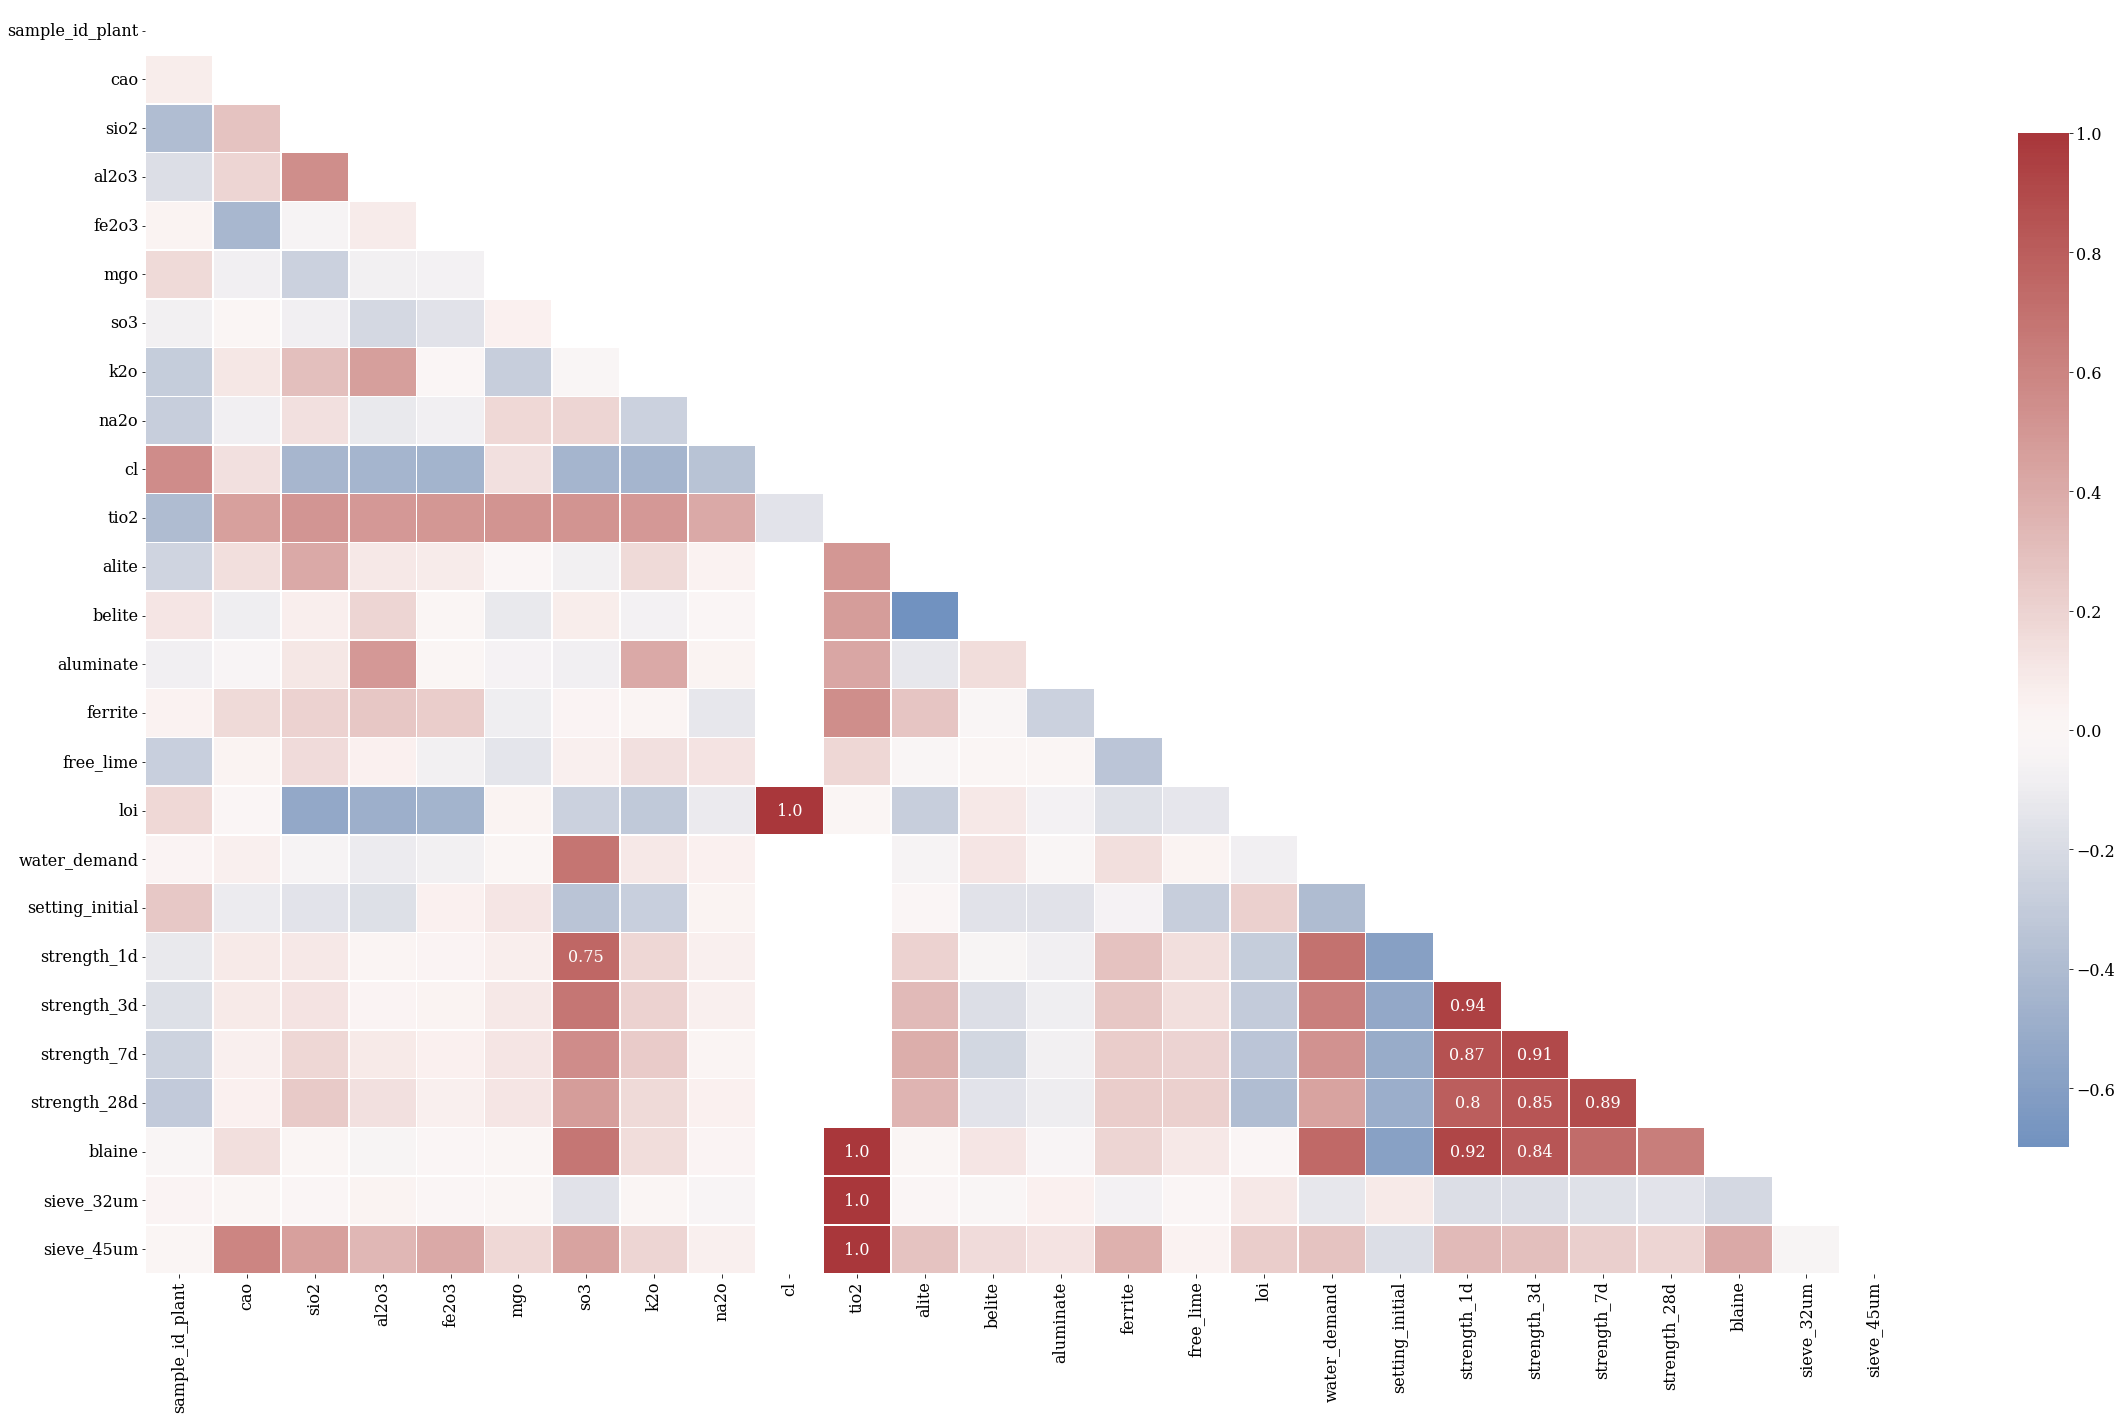

In [40]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 20))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [41]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

tio2          blaine          1.000000
              sieve_32um      1.000000
              sieve_45um      1.000000
cl            loi             0.997317
strength_1d   strength_3d     0.944912
              blaine          0.923446
strength_3d   strength_7d     0.910714
strength_7d   strength_28d    0.892431
strength_1d   strength_7d     0.868210
strength_3d   strength_28d    0.846149
              blaine          0.841087
strength_1d   strength_28d    0.800373
so3           strength_1d     0.750974
water_demand  blaine          0.747311
strength_7d   blaine          0.725520
dtype: float64

In [42]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

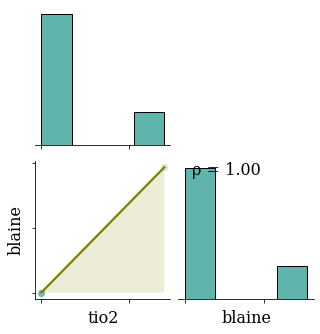

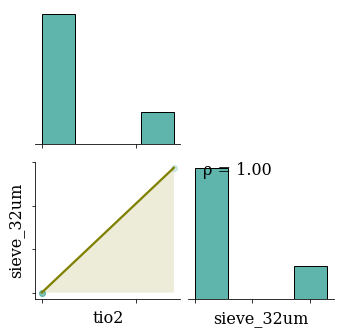

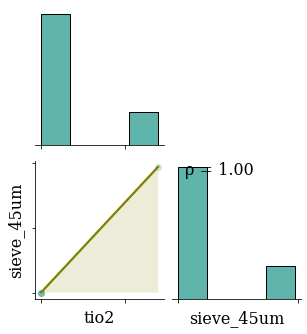

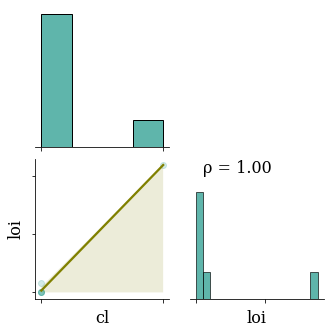

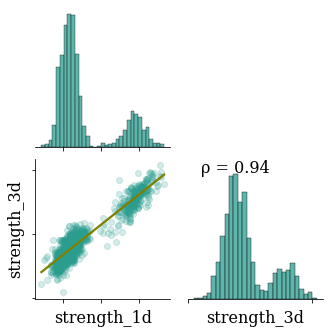

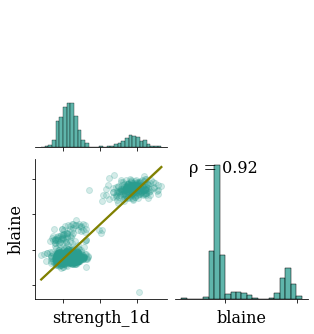

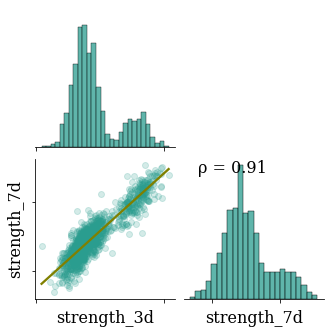

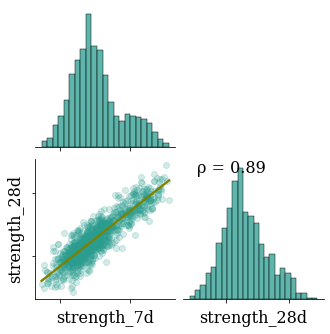

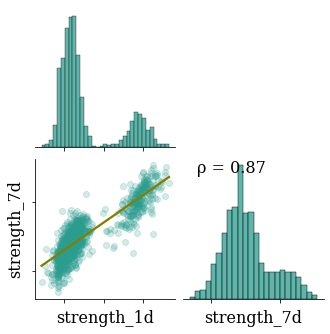

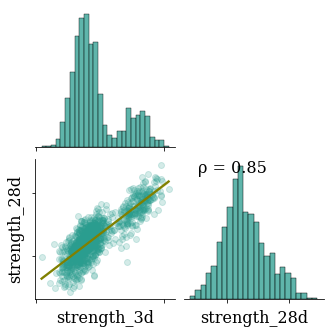

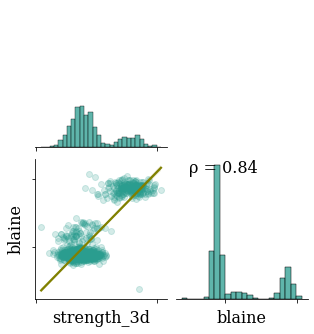

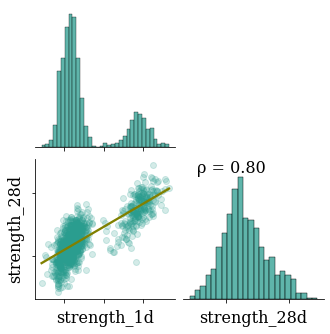

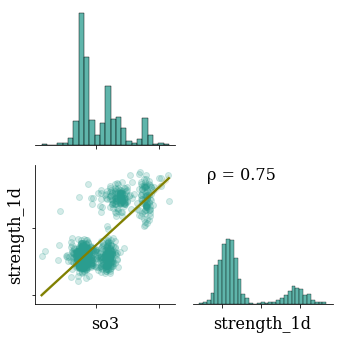

In [43]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Data/Hora Variable Analyses

In [44]:
dates

0        2020-01-01 04:50:00+00:00
1        2020-01-01 05:50:00+00:00
2        2020-01-01 06:50:00+00:00
3        2020-01-01 07:50:00+00:00
4        2020-01-01 08:50:00+00:00
                   ...            
36988    2021-12-31 22:43:00+00:00
36989    2021-12-31 22:50:00+00:00
36990    2021-12-31 23:30:00+00:00
36991    2021-12-31 23:43:00+00:00
36992    2021-12-31 23:50:00+00:00
Name: sample_date, Length: 36993, dtype: object

In [48]:
dates = pd.to_datetime(dates)

In [49]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

521 valid days out of 729


In [50]:
# All years of data
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021}


In [51]:
months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

In [52]:
days_each_month_per_year = {}
for year in years:
    for month in months_each_year[year]:
        days_each_month_per_year[str(year) + "-" + str(month)] = [
            date.day for date in dates if date.year == year and date.month == month
        ]

print("Days of available data for each month each year:")
days_each_month_per_year

Days of available data for each month each year:


{'2020-1': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  7,


In [53]:
# count of days each month per year
count_of_days_each_month_per_year = {}

for year_month, days in days_each_month_per_year.items():
    count_of_days_each_month_per_year[year_month] = len(days)

print("Count of days each month per year:")
count_of_days_each_month_per_year

Count of days each month per year:


{'2020-1': 1149,
 '2020-2': 1136,
 '2020-3': 1562,
 '2020-4': 1604,
 '2020-5': 1426,
 '2020-6': 1804,
 '2020-7': 1760,
 '2020-8': 1568,
 '2020-9': 1559,
 '2020-10': 1693,
 '2020-11': 1776,
 '2020-12': 1296,
 '2021-1': 1225,
 '2021-2': 1046,
 '2021-3': 1470,
 '2021-4': 1727,
 '2021-5': 1617,
 '2021-6': 1668,
 '2021-7': 1681,
 '2021-8': 1707,
 '2021-9': 1632,
 '2021-10': 1896,
 '2021-11': 1737,
 '2021-12': 1254}

In [54]:
max_obs_key = max(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
max_obs_value = count_of_days_each_month_per_year[max_obs_key]
min_obs_key = min(count_of_days_each_month_per_year, key=count_of_days_each_month_per_year.get)
min_obs_value = count_of_days_each_month_per_year[min_obs_key]
print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-2 has the minimum number of days with samples - 1046
2021-10 has the maximum number of days with samples - 1896


In [55]:
mean_obs_per_year = {str(year) : 0 for year in years}

for year, value in count_of_days_each_month_per_year.items():
    mean_obs_per_year[year[:4]] += value

for year, value in months_each_year.items():
    mean_obs_per_year[str(year)] /= len(value)
    mean_obs_per_year[str(year)] = int(mean_obs_per_year[str(year)])
    
print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(np.mean(list(count_of_days_each_month_per_year.values()))))

Mean Number of observations - per year
{'2020': 1527, '2021': 1555}

Mean number of observations - all years
1541


In [56]:
# Here we get the frequency of the whole time series

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i] - dates[i-1])
diffs

[Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 00:10:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:50:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 01:00:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:53:00'),
 Timedelta('0 days 00:07:00'),
 Timedel

In [57]:
# Average Frequency
np.mean(diffs)

Timedelta('0 days 00:28:26.866349480')

In [58]:
Counter(diffs)

Counter({Timedelta('0 days 01:00:00'): 2472,
         Timedelta('0 days 00:10:00'): 553,
         Timedelta('0 days 00:00:00'): 380,
         Timedelta('0 days 00:50:00'): 51,
         Timedelta('0 days 00:53:00'): 1828,
         Timedelta('0 days 00:07:00'): 7511,
         Timedelta('0 days 00:43:00'): 109,
         Timedelta('0 days 01:40:00'): 41,
         Timedelta('0 days 00:20:00'): 4401,
         Timedelta('0 days 00:40:00'): 9467,
         Timedelta('0 days 00:30:00'): 563,
         Timedelta('0 days 02:00:00'): 66,
         Timedelta('0 days 22:07:00'): 1,
         Timedelta('0 days 03:00:00'): 23,
         Timedelta('0 days 00:13:00'): 7138,
         Timedelta('0 days 00:47:00'): 1512,
         Timedelta('0 days 00:17:00'): 100,
         Timedelta('0 days 02:38:29'): 1,
         Timedelta('0 days 00:24:03'): 2,
         Timedelta('0 days 01:42:53'): 1,
         Timedelta('0 days 00:15:36'): 1,
         Timedelta('0 days 03:49:11'): 1,
         Timedelta('0 days 00:05:38'): 1,

<AxesSubplot:xlabel='count'>

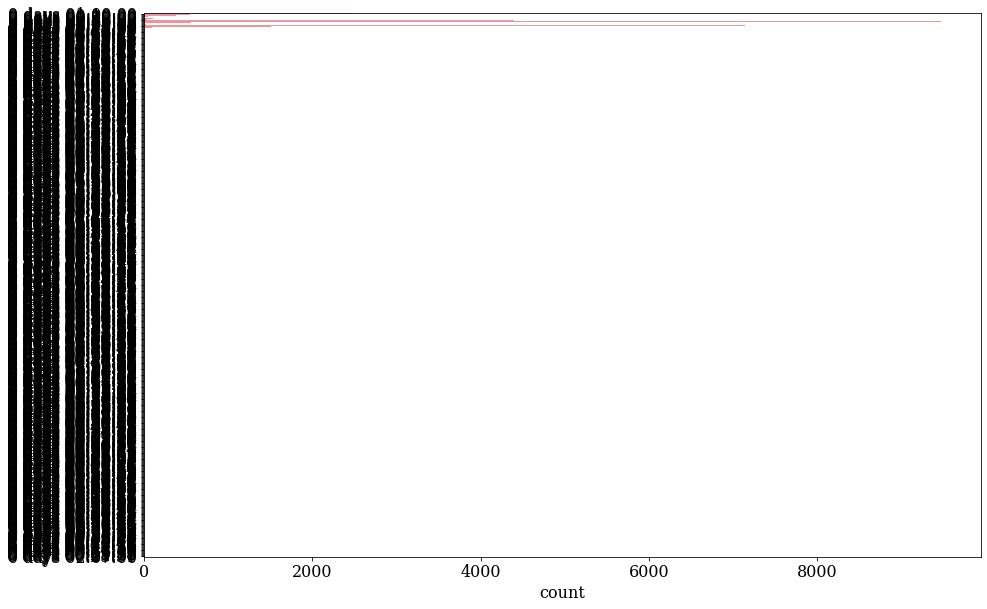

In [59]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y=diffs)

In [60]:
# Same thing but only with the dates

diffs = []

for i in range(1, len(dates)):
    diffs.append(dates[i].date() - dates[i-1].date())

In [61]:
# Average Frequency
np.mean(diffs)

datetime.timedelta(0, 1705, 17301)

In [62]:
Counter(diffs)

Counter({datetime.timedelta(0): 36264,
         datetime.timedelta(1): 727,
         datetime.timedelta(3): 1})

In [63]:
# percent of diffs
[round(val/df.shape[0] *100, 2) for val in list(Counter(diffs).values())]

[98.03, 1.97, 0.0]

<AxesSubplot:xlabel='count'>

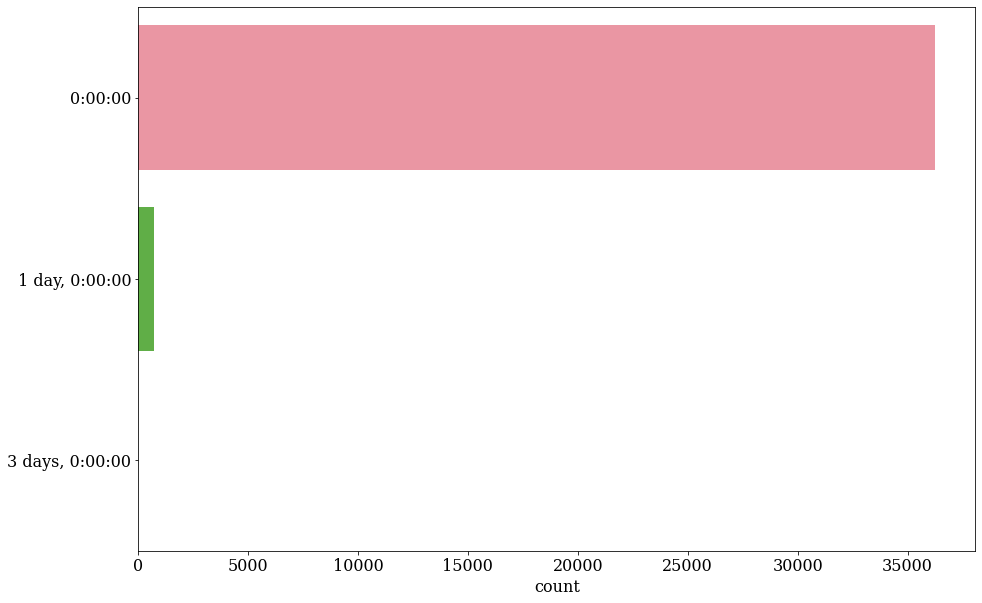

In [64]:
# sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.countplot(y= diffs)

In [72]:
df["sample_date"] = pd.to_datetime(df["sample_date"])

### Compressive Strength Distribution

#### 1 Days

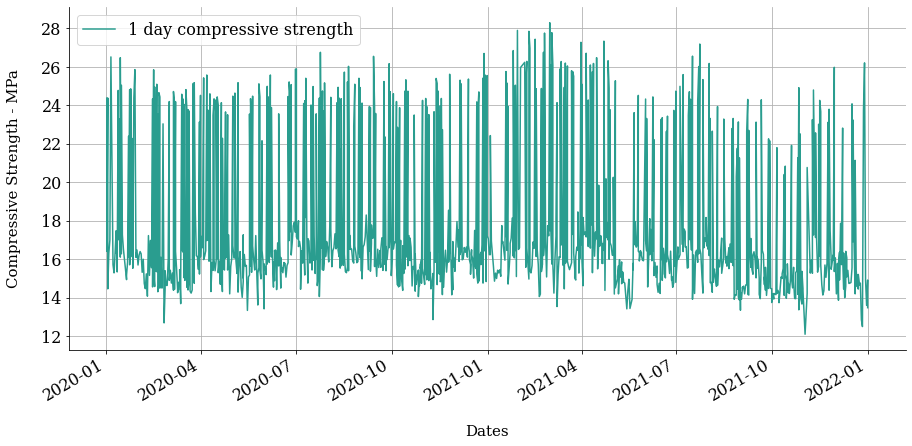

In [73]:
tmp = df[["sample_date", "strength_1d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 3 Days

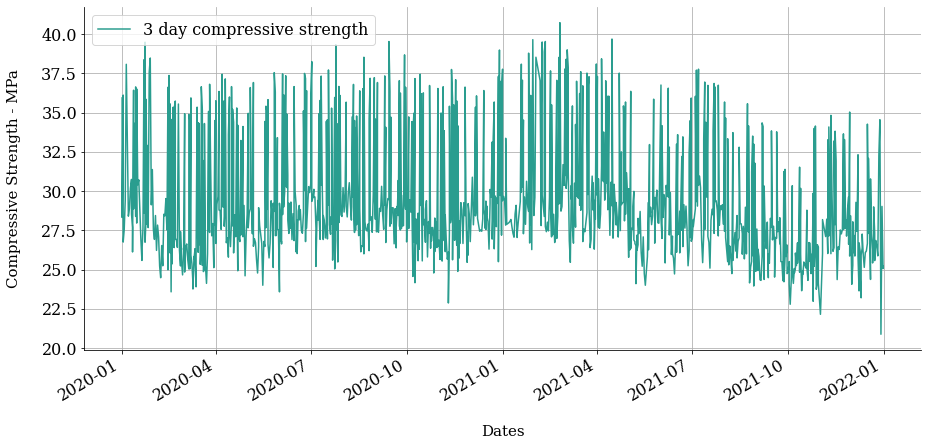

In [74]:
tmp = df[["sample_date", "strength_3d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 7 Days

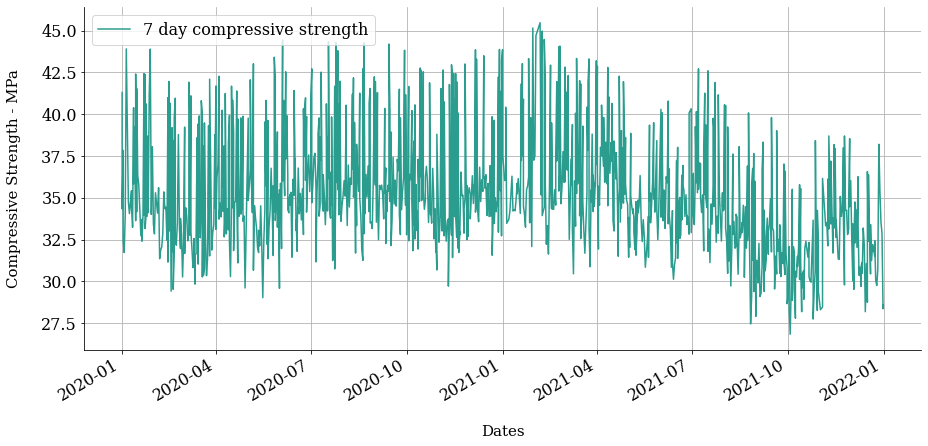

In [75]:
tmp = df[["sample_date", "strength_7d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### 28 Days

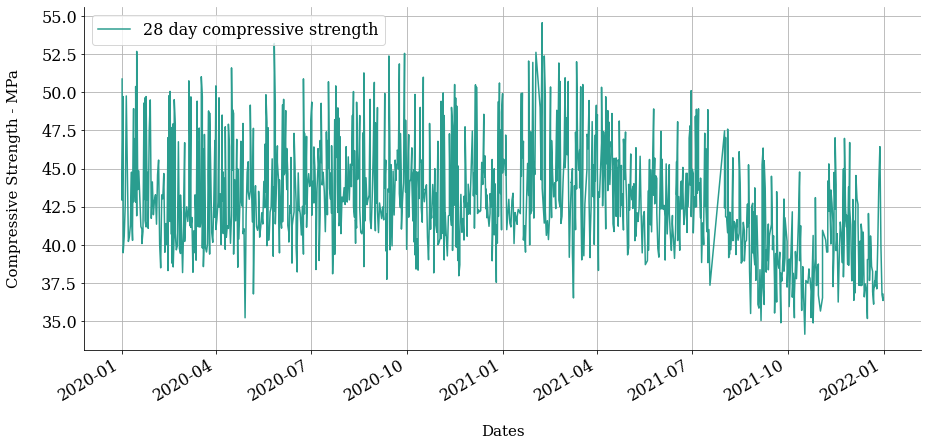

In [76]:
tmp = df[["sample_date", "strength_28d"]].dropna().copy()
tmp = tmp.set_index("sample_date")
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()